# Chicago Taxi trips 

- `taxi_id`: Identificador único para el taxi (INTEGER).
- `trip_start_timestamp`: Fecha y hora de inicio del viaje, redondeada al intervalo de 15 minutos más cercano (TIMESTAMP).
- `trip_end_timestamp`: Fecha y hora de finalización del viaje, redondeada al intervalo de 15 minutos más cercano (TIMESTAMP).
- `trip_seconds`: Duración del viaje en segundos (INTEGER).
- `trip_miles`: Distancia del viaje en millas (FLOAT).
- `pickup_census_tract`: Distrito censal donde comenzó el viaje. Para proteger la privacidad, este dato no se muestra para algunos viajes (INTEGER).
- `dropoff_census_tract`: Distrito censal donde terminó el viaje. Para proteger la privacidad, este dato no se muestra para algunos viajes (INTEGER).
- `pickup_community_area`: Área comunitaria donde comenzó el viaje (INTEGER).
- `dropoff_community_area`: Área comunitaria donde terminó el viaje (INTEGER).
- `fare`: Tarifa del viaje (FLOAT).
- `tips`: Propina del viaje. Las propinas en efectivo generalmente no se registran (FLOAT).
- `tolls`: Peajes del viaje (FLOAT).
- `extras`: Cargos adicionales del viaje (FLOAT).
- `trip_total`: Costo total del viaje, suma de la tarifa, propinas, peajes y cargos adicionales (FLOAT).
- `payment_type`: Tipo de pago para el viaje (STRING).
- `company`: Código identificador de la compañía de taxis (INTEGER).
- `pickup_latitude`: Código identificador para la latitud del centro del distrito censal de recogida o del área comunitaria si el distrito censal se ha ocultado por motivos de privacidad (INTEGER).
- `pickup_longitude`: Código identificador para la longitud del centro del distrito censal de recogida o del área comunitaria si el distrito censal se ha ocultado por motivos de privacidad (INTEGER).
- `pickup_location`: Ubicación del centro del distrito censal de recogida o del área comunitaria si el distrito censal se ha ocultado por motivos de privacidad (STRING).
- `dropoff_latitude`: Código identificador para la latitud del centro del distrito censal de entrega o del área comunitaria si el distrito censal se ha ocultado por motivos de privacidad (INTEGER).
- `dropoff_longitude`: Código identificador para la longitud del centro del distrito censal de entrega o del área comunitaria si el distrito censal se ha ocultado por motivos de privacidad (INTEGER).
- `dropoff_location`: Ubicación del centro del distrito censal de entrega o del área comunitaria si el distrito censal se ha ocultado por motivos de privacidad (STRING).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import os

# Limpieza de datos
### Primero limpieramos el catalogo de empresas

In [2]:
prueba = pd.read_csv("C:/Users/oscar/Downloads/Data_chicago/archive/Data/chicago_taxi_trips_2016_05.csv")
prueba

taxi_id trip_start_timestamp  trip_end_timestamp  trip_seconds  \
0         3454.0    2016-5-4 15:00:00   2016-5-4 15:00:00         300.0   
1         4432.0   2016-5-24 18:15:00  2016-5-24 18:30:00         720.0   
2         4076.0    2016-5-4 15:45:00   2016-5-4 15:45:00          60.0   
3         7929.0   2016-5-22 02:00:00  2016-5-22 02:15:00        1260.0   
4         1985.0   2016-5-12 14:15:00  2016-5-12 14:15:00           0.0   
...          ...                  ...                 ...           ...   
1943579     32.0   2016-5-20 16:45:00  2016-5-20 16:45:00           0.0   
1943580   3948.0   2016-5-10 09:15:00  2016-5-10 09:15:00         660.0   
1943581   8696.0    2016-5-3 15:45:00   2016-5-3 16:45:00        2880.0   
1943582   1947.0   2016-5-17 09:15:00  2016-5-17 09:30:00         840.0   
1943583   7777.0    2016-5-7 18:15:00   2016-5-7 18:30:00         540.0   

         trip_miles  pickup_census_tract  dropoff_census_tract  \
0              1.50                  NaN                 676.0   
1              0.00                  NaN                 959.0   
2              0.00                  NaN                   NaN   
3              4.80                  NaN                  16.0   
4              0.00                  NaN                   NaN   
...             ...                  ...                   ...   
1943579        0.00                  NaN                 134.0   
1943580        0.55                  NaN                 134.0   
1943581       17.90                  NaN                 313.0   
1943582        1.50                  NaN                  16.0   
1943583        1.10                  NaN                 959.0   

         pickup_community_area  dropoff_community_area   fare  tips  tolls  \
0                         28.0                    28.0   7.00   0.0    0.0   
1                         32.0                     8.0   8.50   2.0    0.0   
2                         28.0                    24.0   4.50   0.0    0.0   
3                          6.0                    32.0  17.50   0.0    0.0   
4                          NaN                     NaN   7.50   1.4    0.0   
...                        ...                     ...    ...   ...    ...   
1943579                   24.0                    24.0   3.25   0.0    0.0   
1943580                    8.0                    24.0   7.75   2.0    0.0   
1943581                    8.0                    76.0  46.00   9.5    0.0   
1943582                   32.0                    32.0   9.00   0.0    0.0   
1943583                    8.0                     8.0   7.25   0.0    0.0   

         extras  trip_total payment_type  company  pickup_latitude  \
0           0.0        7.00         Cash      NaN            411.0   
1           0.0       10.50  Credit Card    101.0             18.0   
2           0.0        4.50         Cash    107.0            158.0   
3           1.0       18.50  Credit Card    101.0            606.0   
4           0.0        8.90  Credit Card    119.0              NaN   
...         ...         ...          ...      ...              ...   
1943579     0.0        3.25         Cash    107.0             45.0   
1943580     0.0        9.75  Credit Card      NaN            419.0   
1943581     1.5       57.00  Credit Card     43.0            167.0   
1943582     0.0        9.00         Cash    101.0            744.0   
1943583     1.0        8.25         Cash      NaN            167.0   

         pickup_longitude  dropoff_latitude  dropoff_longitude  
0                   545.0             779.0               81.0  
1                   610.0             167.0              754.0  
2                   270.0             199.0              510.0  
3                   617.0              18.0              610.0  
4                     NaN               NaN                NaN  
...                   ...               ...                ...  
1943579             163.0              45.0              163.0  
1943580          

In [3]:
# Especifica la ruta del archivo JSON
ruta_archivo = r'C:/Users/oscar/Downloads/Data_chicago/archive/column_remapping.json'
# Abre y lee el archivo JSON
with open(ruta_archivo) as archivo:
    datos = json.load(archivo)

    # Convierte los datos a un DataFrame de pandas
df = pd.DataFrame(datos)

In [4]:
df.to_excel("C:/Users/oscar/Downloads/ver.xlsx", index=False)

Podemos notar que en dicho archivo se encuentran los datos de los viajes en taxi en Chicago

lo cual haremos merge con nuestra data de los viajes pero 
* Se debe limpiar los datos (tanto en el archivo josn como en la data)

Ya que si vemos hay compañias que estan vacias aun que hay taxi id 

Despues de analizar los datos hay varios taixs que se perderan que 
* No tiene ID ni compañia
* Solo tiene la clave codificada id pero no podemos descodificar esa info 

Por parte de esta practica al no tener otra data para recuperar datos posiblmente a esos taxis los separemos en sin compañia etc

In [5]:
df_nan = df[pd.isna(df['company'])]
df_nan

taxi_id company  \
120   25b37d641316c0ca5cb44edf8eaf9f012e2495549f60b7...     NaN   
121   adc7f5196ba6908039ab7f7c384e906794213988720341...     NaN   
122   807b5d99114d04269a924c3a1a541b432b8091f9f2e3f7...     NaN   
123   7c51947e529f0b10e944d3ab51b165bdb1cee520ef7bf8...     NaN   
124   0e9f2dd7b140154617d473940c36cfb7956c2cd126dfe8...     NaN   
...                                                 ...     ...   
8758  43aa40841edf3eb3e6112114f39cbd9cae2f45cee24f66...     NaN   
8759  ab16f0667f2608e3dc827483fc4541ade5740316bff4ac...     NaN   
8760  b3947461320274fc1ea81528ba6864a6bb726894fc2109...     NaN   
8761  cc2fe5061e6f477a5a502f17b8c73f0b2476dff6025677...     NaN   
8762  1aed6522859d97072638fadd1dba2c2fafbfd249561482...     NaN   

     pickup_census_tract dropoff_census_tract pickup_latitude  \
120          17031070500          17031070500    41.735123264   
121          17031812802          17031812802    41.779954269   
122          17031240200          17031240200    41.747534263   
123          17031828000          17031828000    41.856333217   
124          17031760801          17031760801    41.660136051   
...                  ...                  ...             ...   
8758                 NaN                  NaN             NaN   
8759                 NaN                  NaN             NaN   
8760                 NaN                  NaN             NaN   
8761                 NaN                  NaN             NaN   
8762                 NaN                  NaN             NaN   

     pickup_longitude dropoff_latitude dropoff_longitude  
120     -87.655878786     41.735123264     -87.655878786  
121     -87.710715958     41.779954269     -87.710715958  
122      -87.67157759     41.747534263      -87.67157759  
123     -87.617576172     41.856333217     -87.617576172  
124     -87.666536278     41.660136051     -87.666536278  
...               ...              ...               ...  
8758              NaN              NaN               NaN  
8759              NaN              NaN               NaN  
8760              NaN              NaN               NaN  
8761              NaN              NaN               NaN  
8762              NaN              NaN               NaN  

[8643 rows x 8 columns]

In [6]:
def drop_terminology(df):
    # Definir las palabras a eliminar
    palabras_a_eliminar = ['Cab', 'Co', 'Inc', 'Corp', 'inc', 'llc', 'LLC', 'Inc.', 'Corp.', 'Group', 'Group,']
    df['company'] = df['company'].str.rstrip('.')
    df = df.dropna()
    # Crear una expresión regular que coincida con cualquier palabra en la lista
    regex_pattern = r'\b(?:' + '|'.join(palabras_a_eliminar) + r')\b'
    # Usar str.replace con la expresión regular para eliminar las palabras
    df['company'] = df['company'].str.replace(regex_pattern, '', regex=True).str.strip()
    return df
df = drop_terminology(df)

C:\Users\oscar\AppData\Local\Temp\ipykernel_5540\2562288771.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company'] = df['company'].str.replace(regex_pattern, '', regex=True).str.strip()


In [7]:
def clean_df_map(df):
    # Eliminar espacios en blanco alrededor de todas las celdas de tipo cadena
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    # Eliminar filas con valores nulos ya que no se pueden mapear la compañía
    df = df.dropna()
    # Usar una expresión regular para dividir la columna 'company' de los '-' ya que algunos estan con y sin espacio
    split_columns = df['company'].str.split(r'\s*-\s*|\s*-\s*', expand=False)
    # Crear nuevas columnas 'ID_Taxi' y 'company'
    df['ID_Taxi'] = split_columns.apply(lambda x: x[0].strip() if len(x) > 1 else None)
    df['company_clean'] = split_columns.apply(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())

    # Para saber como se hizo los strip a company no la alteraremo
    #df['company'] = split_columns.apply(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())

    # eliminar los ID de 5 digitos normalmente son 4 pero re por que hay valores alfa numerioc sy no queremos eliminarlos compañias que tengan 5 digitos como nombre 
    df['company_clean'] = df['company_clean'].apply(lambda x: re.sub(r'\b\d{5} ', '', x))

    # Hay compañias que solo tienen el ID bien, solo pondremo sin nombre y su ID ya que no se puede identificar
    df['company_clean'] = df.apply(lambda row: f"Sin nombre {row['ID_Taxi']}" if re.fullmatch(r'\d+', row['company_clean']) else row['company_clean'], axis=1)
    
    return df
df = clean_df_map(df)

In [8]:
taxi_id_nan = df[pd.isna(df['ID_Taxi'])]
taxi_id_nan.head(3)

taxi_id  \
3   e8872981b0207dc88bc7fc2778d1bf870967eb83ee03ac...   
8   d904764719c56cfb36906cb74c313be2fe666cf5b071da...   
10  3fa040c240f0b86be0d9b46ce482b0e761904f5872f616...   

                         company pickup_census_tract dropoff_census_tract  \
3   Chicago Medallion Management         17031831600          17031831600   
8   Blue Ribbon Taxi Association         17031580700          17031580700   
10         KOAM Taxi Association         17031827902          17031827902   

   pickup_latitude pickup_longitude dropoff_latitude dropoff_longitude  \
3     42.005608023    -87.672538401     42.005608023     -87.672538401   
8     41.921084583    -87.708416729     41.921084583     -87.708416729   
10    41.697269192    -87.731711853     41.697269192     -87.731711853   

   ID_Taxi                 company_clean  
3     None  Chicago Medallion Management  
8     None  Blue Ribbon Taxi Association  
10    None         KOAM Taxi Association

In [9]:
# Reemplazar valores en 'company_clean'
df['company_clean'] = df['company_clean'].replace({
                                                    'CD': 'CID', 'Payment Only': 'T.A.S. - Payment Only', 'Chicago Elite  . (Chicago Carriag': 'Chicago Elite'
                                                   })

# Reemplazar 'T.A.S.' por '0' en 'ID_Taxi' y llenar valores vacíos con '0'
df['ID_Taxi'] = df['ID_Taxi'].replace('T.A.S.', '0')
df['ID_Taxi'].fillna('0', inplace=True)

# Crear una máscara para los valores '0' en 'ID_Taxi'
mask_zeros = df['ID_Taxi'] == '0'

# Eliminar duplicados en 'ID_Taxi', manteniendo solo la primera ocurrencia
df_no_zeros = df[~mask_zeros].drop_duplicates(subset='ID_Taxi', keep='first')

# Concatenar el DataFrame sin los '0' con los '0' al final
df = pd.concat([df_no_zeros, df[mask_zeros]], ignore_index=True)

# Ordenar por 'company_clean' de forma alfabética
df.sort_values(by='company_clean', inplace=True)

### Ahora limpieramos la data donde concatenaremos el catalogo de empresas

In [10]:
def clean_data_taxis(prueba):
    # Rellenar 'taxi_id' con el valor de 'company' cuando 'taxi_id' es NaN, nulo, espacio en blanco o vacío
    prueba['taxi_id'] = prueba.apply(lambda row: row['company'] if pd.isna(row['taxi_id']) or (isinstance(row['taxi_id'], str) and row['taxi_id'].strip() == '') else row['taxi_id'], axis=1)

    return prueba

def types_for_columns(prueba, taxi_id, company):
    prueba[taxi_id] = prueba[taxi_id].astype(int)
    prueba[company] = prueba[company].astype(str)
    
    return prueba

In [11]:
def Time_format(prueba):
    # Supongamos que tu DataFrame se llama 'prueba' y la columna de fecha se llama 'trip_start_timestamp'
    prueba['trip_start_timestamp'] = pd.to_datetime(prueba['trip_start_timestamp'], format='%Y-%m-%d %H:%M:%S')
    # Repetimos el proceso para la columna 'trip_end_timestamp'
    prueba['trip_end_timestamp'] = pd.to_datetime(prueba['trip_end_timestamp'], format='%Y-%m-%d %H:%M:%S')
    return prueba

In [12]:
def cleaning_process_data(prueba, df):
    prueba = clean_data_taxis(prueba)
    prueba = types_for_columns(prueba, 'taxi_id', 'company')
    prueba = Time_format(prueba)
    prueba = prueba.drop(columns=['company'])
    df = types_for_columns(df, 'ID_Taxi', 'company_clean')

    df = df[['pickup_census_tract', 'dropoff_census_tract', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'ID_Taxi', 'company_clean']]
    df.columns = ['pickup_tract', 'dropoff_tract', 'pickup_lat', 'pickup_long', 'dropoff_lat', 'dropoff_long', 'ID_Taxi', 'company_name']

    # Merge entre los DataFrames
    df_process = pd.merge(prueba, df, left_on='taxi_id', right_on='ID_Taxi', how='inner')
    # Estos errores son básicamente los taxis que no se encuentran en el archivo de mapeo donde está su ID por lo cual sería mejor con cliente arreglarlo que simplemente eliminarlo pero no los mapearemos
    error_id_company = prueba[~prueba['taxi_id'].isin(df_process['taxi_id'])]
    df_process = df_process.drop('pickup_census_tract', axis=1)
    df_process = df_process.fillna(0.00)

    return df_process, error_id_company

# Uso de la función
# df_process, error_id_company = cleaning_process_data(prueba, df)


In [13]:
folder_path = "C:/Users/oscar/Downloads/Data_chicago/archive/Data/"

# Listas para almacenar los resultados de cada archivo
df_list = []
error_df_list = []

# Iterar sobre los archivos en la carpeta
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        # Cargar el archivo CSV
        prueba = pd.read_csv(file_path)
        # Aplicar cleaning_process_data a cada archivo
        
        df_process, error_id_company = cleaning_process_data(prueba, df)
        # Almacenar los resultados en las listas
        df_list.append(df_process)
        error_df_list.append(error_id_company)

# Concatenar todos los resultados para obtener el DataFrame final
df['company_clean'] = df['company_clean'].replace({
                                                    'CD': 'CID', 'Payment Only': 'T.A.S. - Payment Only', 'Chicago Elite  . (Chicago Carriag': 'Chicago Elite', 'Blue Ribbon Taxi Association': 'Blue'
                                                   })
df = pd.concat(df_list, ignore_index=True)
error_df = pd.concat(error_df_list, ignore_index=True)


In [14]:
error_df.shape[0]

19740176

Observaciones
 * Hay 19740176 datos en error, los cuales a nivel cliente lo ideal es plantear una solucion para recuperar esos datos asi tener una mejor toma de decisiones
 * No se toman por que no se podria unir para obtener cordenadas de viaje, es mucho mejor que un cliente llene esos ID y evitar sesgos
 * Se podria tener un catalogo de ID omologado para que se pueda recuperar la informacion de los viajes inclusive a futuro y que todo sea automatizado 
 

# Creamos una tabla analitica de datos

Analizar la información a nivel compañía 
- (a) Nombre de la compañía
- (b) Número de Taxis pertenecientes a la compañía
- (c) Número promedio de viajes por taxi
- (d) Tarifa promedio por viaje
- (e) Propina promedio por viaje
- (f) Costo promedio de las herramientas utilizadas
- (g) Extras promedio
- (h) Duración promedio de los viajes
- (i) Duración total de los viajes
- (j) Distancia promedio por viaje
- (k) Distancia total recorrida por sus taxis
- (l) Distancia máxima recorrida en un viaje
- (m) Distancia mínima recorrida en un viaje
- (n) Tiempo máximo recorrido en un viaje
- (o) Tiempo mínimo recorrido en un viaje
- (p) Tipo de pago con mayor recurrencia


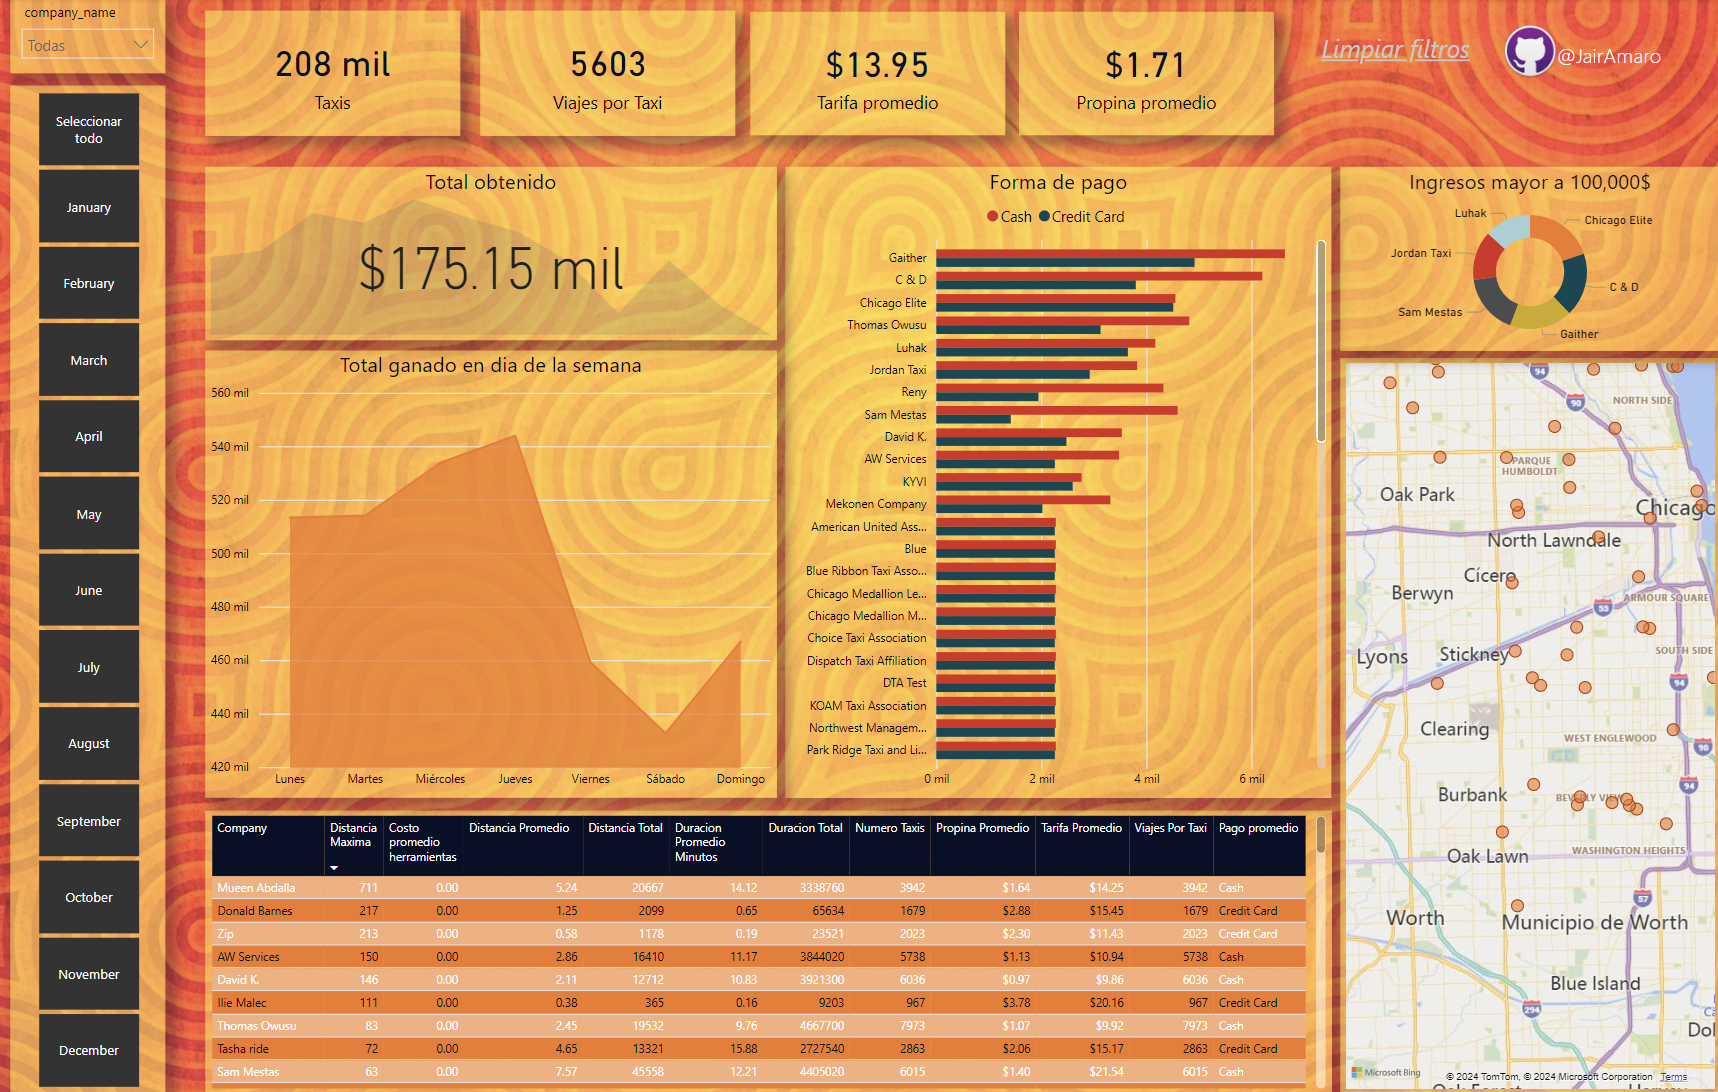

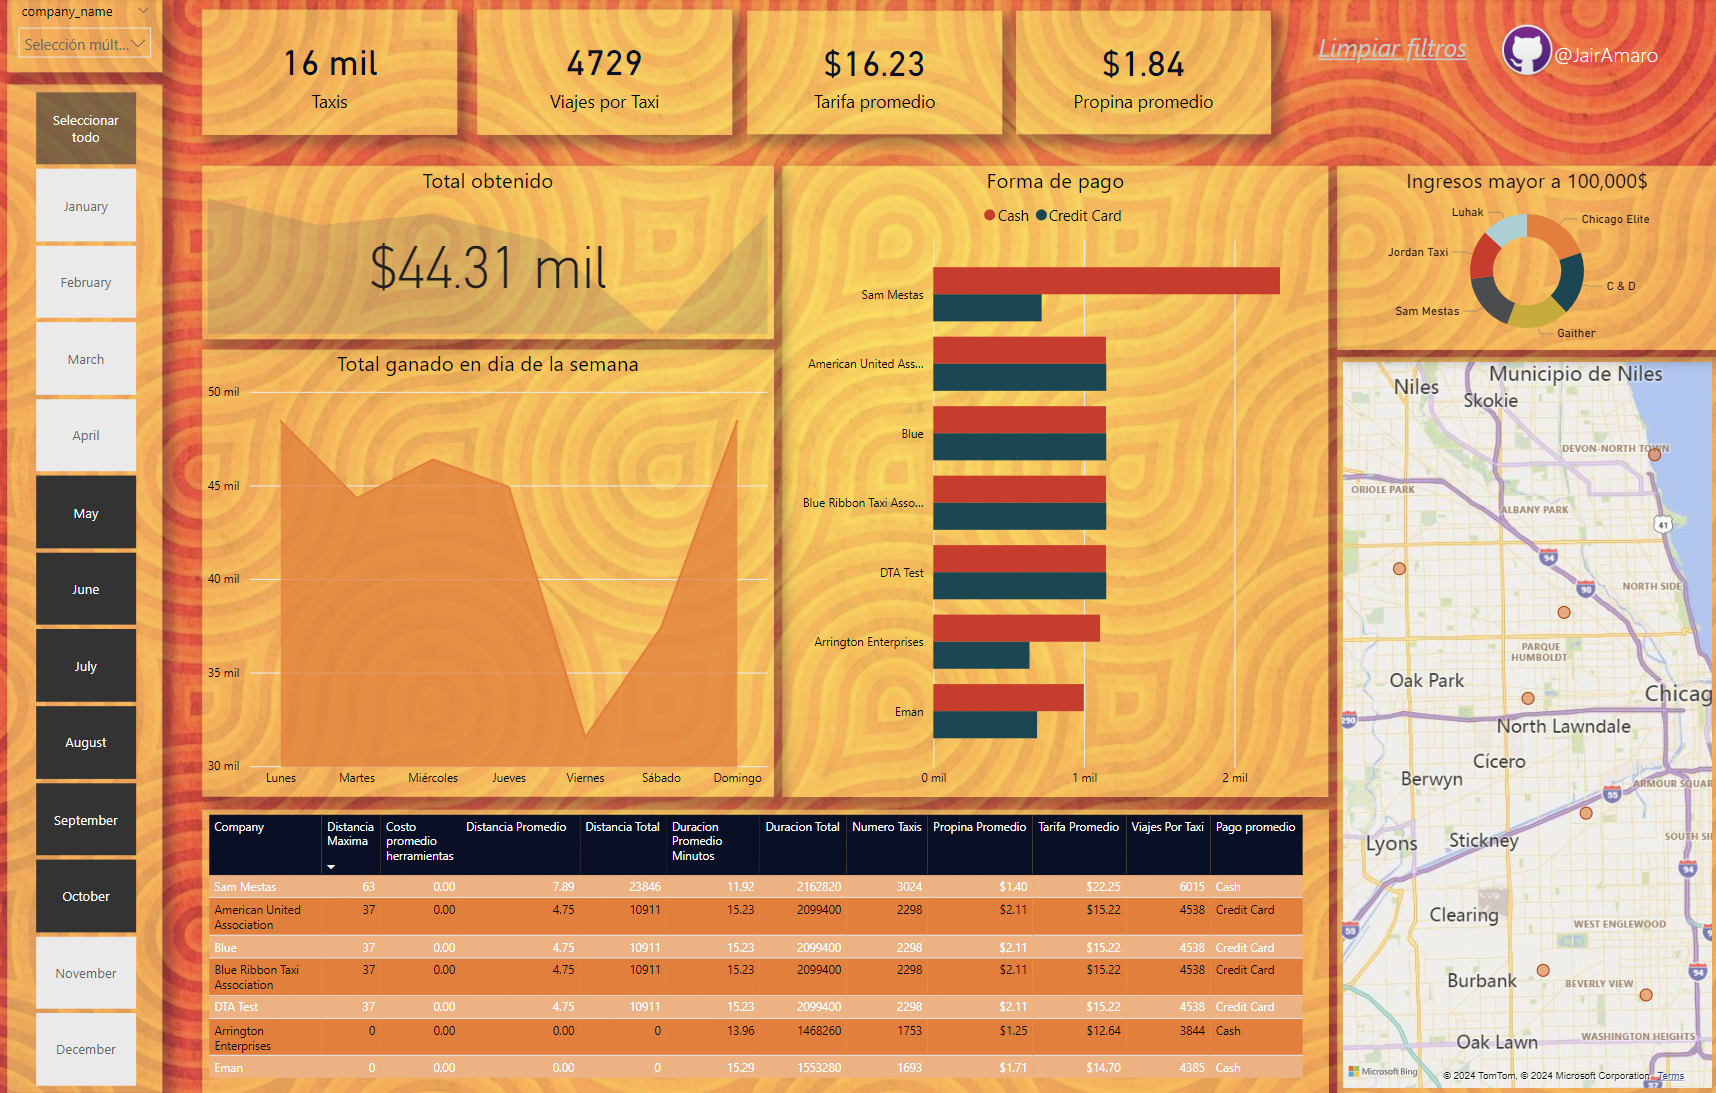

In [15]:
df_modelo = df.copy()

In [16]:
df_modelo

taxi_id trip_start_timestamp   trip_end_timestamp  trip_seconds  \
0          1408  2016-01-31 03:00:00  2016-01-31 03:00:00           0.0   
1          1408  2016-01-31 02:00:00  2016-01-31 02:00:00           0.0   
2          1408  2016-01-28 20:00:00  2016-01-28 20:00:00           0.0   
3          1408  2016-01-06 16:00:00  2016-01-06 16:00:00           0.0   
4          1408  2016-01-04 18:00:00  2016-01-04 18:00:00           0.0   
...         ...                  ...                  ...           ...   
207660     2809  2016-12-15 13:00:00  2016-12-15 14:15:00        4620.0   
207661     2809  2016-12-20 13:30:00  2016-12-20 13:30:00          60.0   
207662     2809  2016-12-07 15:30:00  2016-12-07 15:30:00           0.0   
207663     2809  2016-12-17 13:30:00  2016-12-17 13:30:00           0.0   
207664      694  2016-12-19 13:45:00  2016-12-19 13:45:00           0.0   

        trip_miles  dropoff_census_tract  pickup_community_area  \
0              0.0                   0.0                    0.0   
1              0.0                   0.0                    0.0   
2              0.0                   0.0                    0.0   
3              0.0                   0.0                    0.0   
4              0.0                   0.0                    0.0   
...            ...                   ...                    ...   
207660         0.8                   0.0                   32.0   
207661         0.0                 313.0                   76.0   
207662         0.0                   0.0                   76.0   
207663         0.0                   0.0                   33.0   
207664         0.0                   0.0                    0.0   

        dropoff_community_area   fare  tips  ...  dropoff_latitude  \
0                          0.0  15.25  3.05  ...               0.0   
1                          0.0   8.50  1.70  ...               0.0   
2                          0.0   8.75  1.75  ...               0.0   
3                          0.0   5.25  0.00  ...               0.0   
4                          0.0   6.00  1.20  ...               0.0   
...                        ...    ...   ...  ...               ...   
207660                     2.0  50.50  0.00  ...             684.0   
207661                    76.0   3.50  0.00  ...             225.0   
207662                     0.0   3.25  0.00  ...               0.0   
207663                     0.0   3.25  0.00  ...               0.0   
207664                     0.0  50.00  0.00  ...               0.0   

        dropoff_longitude  pickup_tract dropoff_tract    pickup_lat  \
0                     0.0   17031160601   17031160601  41.982745595   
1                     0.0   17031160601   17031160601  41.982745595   
2                     0.0   17031160601   17031160601  41.982745595   
3                     0.0   17031160601   17031160601  41.982745595   
4                     0.0   17031160601   17031160601  41.982745595   
...                   ...           ...           ...           ...   
207660              503.0   17031823702   17031823702  41.801226836   
207661                6.0   17031823702   17031823702  41.801226836   
207662                0.0   17031823702   17031823702  41.801226836   
207663                0.0   17031823702   17031823702  41.801226836   
207664                0.0   17031802900   17031802900  41.915290836   

          pickup_long   dropoff_lat   dropoff_long ID_Taxi    company_name  
0       -87.621436144  41.982745595  -87.621436144    1408   Donald Barnes  
1       -87.621436144  41.982745595  -87.621436144    1408   Donald Barnes  
2       -87.621436144  41.982745595  -87.621436144    1408   Donald Barnes  
3       -87.621436144  41.982745595  -87.621436144    1408   Donald Barnes  
4       -87.621436144  41.982745595  -87.621436144    1408   Donald Barnes  
...               ...           ...            ...     ...             ...  
207660  -87.781964023  41.801226836  -87.781964023    2809           